In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [2]:
df_full = pd.read_excel(f'/content/Задание (пролонгация).xlsx', sheet_name='data_full', index_col='ID')

In [3]:
df_full.head().T

ID,1,2,3,4,5
Filial,Магнитогорский,Магнитогорский,Ростовский,Казанский,Московский
Type_ts,Иностранные,Отечественные,Отечественные,Иностранные,Иностранные
passport_region,Челябинская область,Челябинская область,Ростовская область,Республика Татарстан,Москва
VIP,NaN,NaN,NaN,NaN,NaN
Brand,TOYOTA,LADA,LADA,KIA,DATSUN
Model,RAV 4,GRANTA,GRANTA,RIO,ON-DO
Yr_production,2018,2016,2018,2016,2018
GAP,Нет,Нет,Нет,Нет,Нет
married,Состоит в браке,Состоит в браке,Не состоит в браке,Не состоит в браке,Состоит в браке
KBM,8,8,8,8,8


In [4]:
# Проверим дубли
df_full[df_full.duplicated(keep=False)]

,Filial,Type_ts,passport_region,VIP,Brand,Model,Yr_production,GAP,married,KBM,...,Age,Exp,discount,Amount - gr,sex,premium_car,price_gr,price_prc,OSAGO_clnt,target
ID,,,,,,,,,,,,,,,,,,,,,
295,Тульский,Иностранные,Тульская область,NaN,TOYOTA,RAV 4,2018,Нет,Состоит в браке,8,...,35,7,1.00,1800000,F,0,70000,0.055,0,1
526,Московский,Иностранные,Москва,NaN,FORD,EXPLORER,2018,Да,Состоит в браке,8,...,62,43,0.95,2800000,M,0,60000,0.020,0,1
778,Краснодарский,Иностранные,Калужская область,Особый статус +,BMW,X5,2018,Нет,Состоит в браке,8,...,39,17,1.00,3000000,M,1,70000,0.020,1,1
961,Краснодарский,Иностранные,Калужская область,Особый статус +,BMW,X5,2018,Нет,Состоит в браке,8,...,39,17,1.00,3000000,M,1,70000,0.020,1,1
1923,Краснодарский,Иностранные,Калужская область,Особый статус +,BMW,X5,2018,Нет,Состоит в браке,8,...,39,17,1.00,3000000,M,1,70000,0.020,1,1
2070,Московский,Иностранные,Москва,NaN,SKODA,OCTAVIA,2018,Нет,Состоит в браке,8,...,36,18,0.95,1000000,M,0,35000,0.035,1,0
2145,Московский,Иностранные,Москва,NaN,AUDI,Q5,2018,Нет,Состоит в браке,8,...,42,20,0.95,3000000,M,1,60000,0.020,1,1
2179,Краснодарский,Иностранные,Краснодарский край,NaN,RENAULT,SANDERO,2018,Нет,Состоит в браке,8,...,37,18,1.10,600000,M,0,35000,0.050,1,0
2396,Новосибирский,Иностранные,Новосибирская область,NaN,HYUNDAI,SOLARIS,2016,Нет,Состоит в браке,6,...,35,13,1.00,400000,F,0,15000,0.035,0,0


In [5]:
# было найдено 60 дублирующихся значений. Вероятно, это ошибка при сборе данных. Очистим их и проверим итог
df_full.drop_duplicates(subset=None, keep='first', inplace=True)
df_full[df_full.duplicated(keep=False)]

,Filial,Type_ts,passport_region,VIP,Brand,Model,Yr_production,GAP,married,KBM,...,Age,Exp,discount,Amount - gr,sex,premium_car,price_gr,price_prc,OSAGO_clnt,target
ID,,,,,,,,,,,,,,,,,,,,,


In [6]:
# нормализуем названия столбцов и текст
df_full.columns = df_full.columns.str.lower().str.replace(' ', '_')

string_columns = list(df_full.dtypes[df_full.dtypes == 'object'].index)

for col in string_columns:
    df_full[col] = df_full[col].str.lower().str.replace(' ', '_')

In [7]:
# смотрим типы переменных и информацию о количестве пропусков. Типы переменных соответствуют. Пропуски присутствуют в 3-х переменных: vip, model, deduct_amount
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10828 entries, 1 to 10863
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   filial           10828 non-null  object 
 1   type_ts          10828 non-null  object 
 2   passport_region  10828 non-null  object 
 3   vip              281 non-null    object 
 4   brand            10828 non-null  object 
 5   model            10614 non-null  object 
 6   yr_production    10828 non-null  int64  
 7   gap              10828 non-null  object 
 8   married          10828 non-null  object 
 9   kbm              10828 non-null  int64  
 10  kbm_prol_est     10828 non-null  int64  
 11  delta_kbm        10828 non-null  int64  
 12  deduct           10828 non-null  object 
 13  deduct_amount    3705 non-null   object 
 14  product          10828 non-null  object 
 15  bank             10828 non-null  object 
 16  channel_-_map    10828 non-null  object 
 17  category    

In [8]:
# проанализируем категориальные переменные. Бесполезные переменные отсутствуют.
df_full.select_dtypes(include='object').describe()

,filial,type_ts,passport_region,vip,brand,model,gap,married,deduct,deduct_amount,product,bank,channel_-_map,category,kvs_type,sex
count,10828,10828,10828,281,10828,10614,10828,10828,10828,3705,10828,10828,10828,10828,10828,10828
unique,22,2,85,2,23,188,2,2,3,2,4,3,2,4,2,3
top,московский,иностранные,москва,особый_статус_+,lada,rio,нет,состоит_в_браке,без_франшизы,20000-,классика,банк,автосалоны,nb_0-1,водители_согласно_перечню,m
freq,3283,8319,1594,198,2177,913,9718,8466,7123,2004,7674,5813,8382,6051,10719,7159


In [9]:
# обработаем пропуски
# посмотрим значения по полю VIP, в котором присутствуют пропуски
df_full.vip.value_counts()

особый_статус_+    198
особый_статус       83
Name: vip, dtype: int64

In [10]:
# по полю VIP заменяем Nan на категорию "отсутствует" для дальнейшего One-Hot кодирования (OHE)
df_full.vip.fillna(value='отсутствует', inplace=True)

In [11]:
# проанализируем пропуски по признаку 'model'. Посмотрим у каких марок есть пропуски
df_lack_model = df_full[df_full.model.isnull()]
df_lack_model.brand.value_counts()

lada     183
mazda     31
Name: brand, dtype: int64

In [12]:
# проведем замену пропусков модой по каждой из марок
df_full.loc[df_full['brand'] == 'lada', 'model'] = df_full.loc[df_full['brand'] == 'lada', 'model'].fillna(value=df_full[df_full.brand == 'lada'].model.value_counts().index[0])
df_full.loc[df_full['brand'] == 'mazda', 'model'] = df_full.loc[df_full['brand'] == 'mazda', 'model'].fillna(value=df_full[df_full.brand == 'mazda'].model.value_counts().index[0])

In [13]:
# проанализируем пропуски по признаку 'deduct_amount'
df_full.deduct_amount.value_counts()

20000-    2004
20000+    1701
Name: deduct_amount, dtype: int64

In [14]:
df_full.deduct_amount.fillna(value='lack_fr', inplace=True)

In [15]:
# переопределим категории для OHE
deduct_amount_values = {
    'lack_fr': 'lack_fr',
    '20000-': 'low_fr',
    '20000+': 'high_fr'
}

df_full.deduct_amount = df_full.deduct_amount.map(deduct_amount_values)

In [16]:
df_full.deduct_amount.value_counts()

lack_fr    7123
low_fr     2004
high_fr    1701
Name: deduct_amount, dtype: int64

In [17]:
# Определим наиболее важные признаки, оценив и отсортировав коэффициенты корреляции Пирсона. Отрицательные значения в 'values' означают обратную корреляцию
df_cor = df_full.drop(['target'], axis=1).corrwith(df_full.target).to_frame('values')
df_cor = df_cor.assign(sorted = df_cor['values'].abs())
df_cor.sort_values(['sorted'], ascending=False)

<ipython-input-17-f33b758884f0>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cor = df_full.drop(['target'], axis=1).corrwith(df_full.target).to_frame('values')


,values,sorted
kbm_prol_est,-0.119907,0.119907
kbm,-0.116491,0.116491
yr_production,-0.100183,0.100183
price_prc,-0.066242,0.066242
delta_kbm,-0.055614,0.055614
age,0.040398,0.040398
osago_clnt,0.035456,0.035456
premium_car,0.034748,0.034748
price_gr,-0.031033,0.031033
exp,0.023892,0.023892


<ipython-input-18-f5677c03c19e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_full.corr(), annot=True, cmap='coolwarm')


<Axes: >

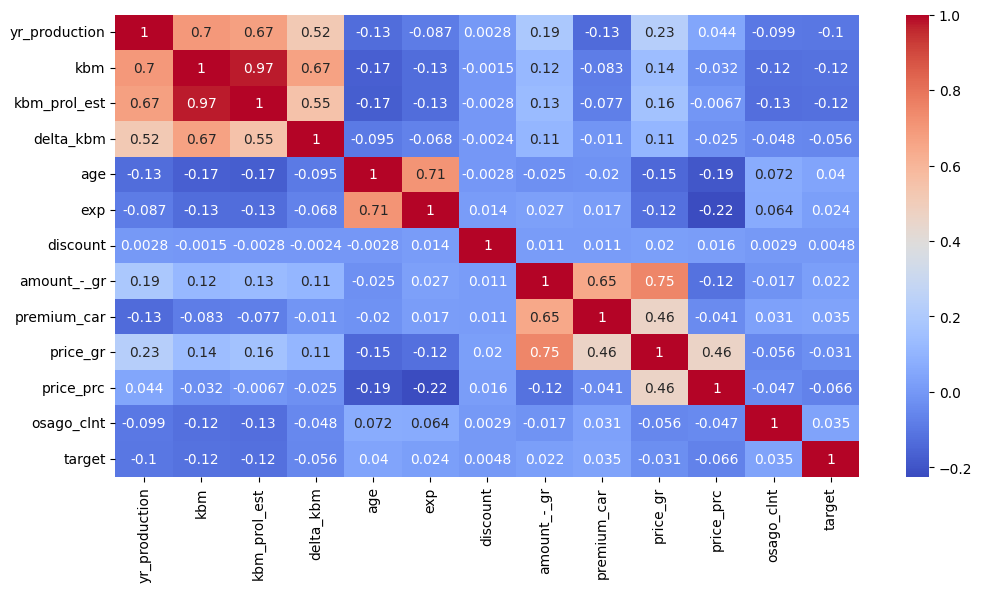

In [18]:
# посмотрим тепловую карту перекрестной корреляции признаков. Аномальные корреляции между признаками не наблюдаются.
plt.figure(figsize = (12,6))
sns.heatmap(df_full.corr(), annot=True, cmap='coolwarm')

In [19]:
# Смотрим общие статистики количественных переменных
df_full.describe().round()

,yr_production,kbm,kbm_prol_est,delta_kbm,age,exp,discount,amount_-_gr,premium_car,price_gr,price_prc,osago_clnt,target
count,10828.0,10828.0,10828.0,10828.0,10828.0,10828.0,10828.0,10828.0,10828.0,10828.0,10828.0,10828.0,10828.0
mean,2017.0,7.0,5.0,-5.0,44.0,17.0,1.0,976081.0,0.0,32769.0,0.0,1.0,-0.0
std,2.0,2.0,2.0,17.0,11.0,10.0,0.0,676907.0,0.0,19663.0,0.0,0.0,1.0
min,2009.0,0.0,0.0,-100.0,18.0,0.0,1.0,0.0,0.0,10000.0,0.0,0.0,-1.0
25%,2016.0,6.0,5.0,-2.0,35.0,10.0,1.0,600000.0,0.0,15000.0,0.0,0.0,-1.0
50%,2018.0,8.0,6.0,-2.0,42.0,16.0,1.0,800000.0,0.0,30000.0,0.0,1.0,0.0
75%,2018.0,8.0,6.0,-2.0,52.0,22.0,1.0,1200000.0,0.0,45000.0,0.0,1.0,0.0
max,2018.0,12.0,10.0,2.0,84.0,63.0,1.0,3000000.0,1.0,70000.0,0.0,1.0,1.0


In [20]:
# посмотрим на балансировку классов целевой переменной. Значительного дисбаланса не наблюдается
df_full.target.value_counts(normalize=True)

 0    0.481899
-1    0.300332
 1    0.217769
Name: target, dtype: float64

In [21]:
# Проанализировав значения количественных переменных, становится ясно, что логичнее перевести 
# некоторые переменные из количественных в категориальные для дальнейшего One-Hot кодирования.
# Переменные для перевода: yr_production, kbm, kbm_prol_est, delta_kbm, discount, premium_car, osago_clnt
for col in df_full.dtypes[df_full.dtypes != 'object'].index.tolist():
  print(col)
  print(df_full[col].value_counts())

yr_production
2018    5495
2017    2583
2016    1332
2015     462
2014     410
2013     254
2012     162
2011      78
2010      43
2009       9
Name: yr_production, dtype: int64
kbm
8     7893
6     1328
4      592
0      348
2      190
7      188
5      150
3       57
1       55
9       12
10      10
12       3
11       2
Name: kbm, dtype: int64
kbm_prol_est
6     7450
4     1277
0      585
2      568
7      414
5      228
3      167
1       60
9       40
8       22
10      17
Name: kbm_prol_est, dtype: int64
delta_kbm
-2      9833
-1       575
-100     348
 1        44
 0        14
 2        14
Name: delta_kbm, dtype: int64
age
40    395
35    389
36    376
38    369
34    368
     ... 
81      3
83      2
82      1
80      1
84      1
Name: age, Length: 67, dtype: int64
exp
10    603
18    567
11    533
17    497
12    478
9     468
15    444
13    440
16    436
19    435
8     403
20    397
14    387
21    371
7     344
23    291
6     285
22    276
5     259
24    242
4     231
25

In [22]:
# переводим переменные в категориальные
for col in ['yr_production', 
            'kbm', 
            'kbm_prol_est', 
            'delta_kbm', 
            'discount', 
            'premium_car', 
            'osago_clnt']:
    df_full[col] = df_full[col].apply(lambda x: f"cat_{x}")

In [23]:
# посмотрим результат
df_full[['yr_production', 
            'kbm', 
            'kbm_prol_est', 
            'delta_kbm', 
            'discount', 
            'premium_car', 
            'osago_clnt']].head()

,yr_production,kbm,kbm_prol_est,delta_kbm,discount,premium_car,osago_clnt
ID,,,,,,,
1,cat_2018,cat_8,cat_6,cat_-2,cat_1.0,cat_0,cat_0
2,cat_2016,cat_8,cat_6,cat_-2,cat_1.05,cat_0,cat_0
3,cat_2018,cat_8,cat_6,cat_-2,cat_0.95,cat_0,cat_1
4,cat_2016,cat_8,cat_6,cat_-2,cat_1.1,cat_0,cat_1
5,cat_2018,cat_8,cat_6,cat_-2,cat_1.0,cat_0,cat_0


In [24]:
# посмотрим статистики оставшихся количественных переменных
df_full.describe().round(2)

,age,exp,amount_-_gr,price_gr,price_prc,target
count,10828.00,10828.00,10828.00,10828.00,10828.00,10828.00
mean,43.70,17.25,976080.53,32769.21,0.03,-0.08
std,11.25,9.61,676907.00,19663.37,0.02,0.72
min,18.00,0.00,0.00,10000.00,0.00,-1.00
25%,35.00,10.00,600000.00,15000.00,0.02,-1.00
50%,42.00,16.00,800000.00,30000.00,0.03,0.00
75%,52.00,22.00,1200000.00,45000.00,0.04,0.00
max,84.00,63.00,3000000.00,70000.00,0.10,1.00


<Axes: ylabel='Frequency'>

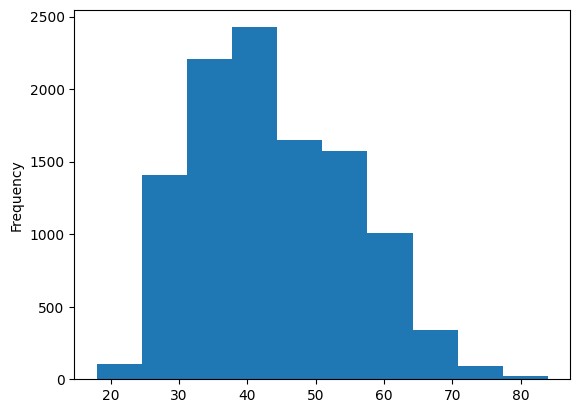

In [25]:
# посмотрим распределения оставшихся количественных переменных
df_full['age'].plot.hist()

<Axes: ylabel='Frequency'>

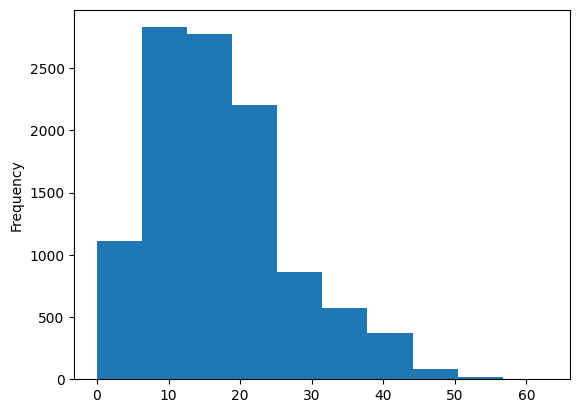

In [26]:
df_full['exp'].plot.hist()

<Axes: ylabel='Frequency'>

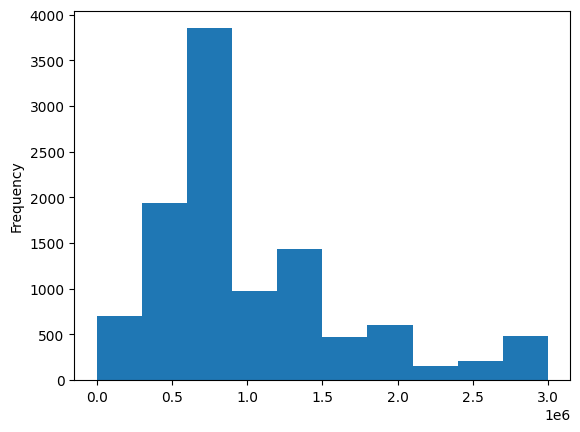

In [27]:
df_full['amount_-_gr'].plot.hist()

<Axes: ylabel='Frequency'>

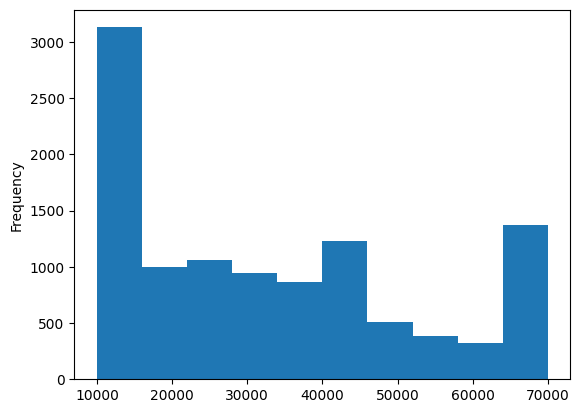

In [28]:
df_full['price_gr'].plot.hist()

<Axes: ylabel='Frequency'>

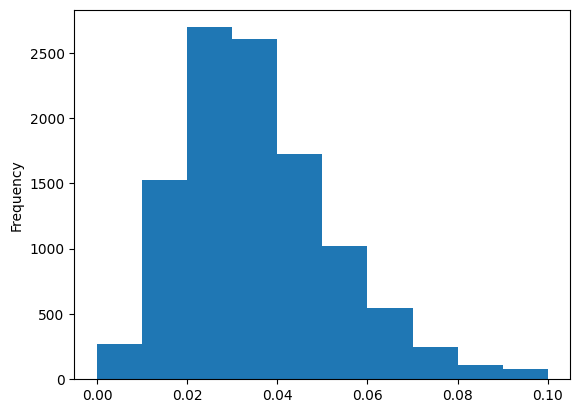

In [29]:
df_full['price_prc'].plot.hist()

In [30]:
# проведм биннинг по количественным переменным - разобьем значения по группам
# переменная 'age'
bins = [18, 26, 36, 51, np.inf]
df_full['age'] = pd.cut(df_full['age'], bins, labels=False, include_lowest=True)

In [31]:
  # переменная 'exp'
bins = [-np.inf, 1, 2, 5, 10, np.inf]
df_full['exp'] = pd.cut(df_full['exp'], bins, labels=False)

In [32]:
# переменная 'amount_-_gr'
bins = [-np.inf, 500000, 1000000, 2000000, 3000000]
df_full['amount_-_gr'] = pd.cut(df_full['amount_-_gr'], bins, labels=False)

In [33]:
# переменная 'price_gr'
bins = [10000, 15000, 30000, 45000, np.inf]
df_full['price_gr'] = pd.cut(df_full['price_gr'], bins, labels=False, include_lowest=True)

In [34]:
# переменная 'price_prc'
bins = [-np.inf, 0.02, 0.03, 0.045, 0.1]
df_full['price_prc'] = pd.cut(df_full['price_prc'], bins, labels=False)

In [35]:
# выделим тестовую выборку из общего датасета, сформируем массив меток тестовой выборки
X_test = df_full[df_full.target == -1]
y_test = X_test.pop('target')

df = df_full[df_full['target'] != -1]

In [36]:
# обучающий датасет разобъем на обучающий и валидационный
X_train, X_val, y_train, y_val = train_test_split(
    df.drop('target', axis=1),
    df['target'],
    test_size=0.2,
    stratify=df['target'],
    random_state=42)

In [37]:
# создадим списки категориальных и количественных переменных
num_cols = X_train.dtypes[X_train.dtypes != 'object'].index.tolist()
cat_cols = X_train.dtypes[X_train.dtypes == 'object'].index.tolist()

In [38]:
# В случае проведения биннинга отсутствие стандартизации показало более высокие результаты

# standardscaler = StandardScaler()
# X_train[num_cols] = standardscaler.fit_transform(X_train[num_cols])
# X_val[num_cols] = standardscaler.transform(X_val[num_cols])
# X_test[num_cols] = standardscaler.transform(X_test[num_cols])

In [39]:
# применим one-hot-encoding
dv = DictVectorizer(sparse=False)

train_dict = X_train[num_cols + cat_cols].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = X_val[num_cols + cat_cols].to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = X_test[num_cols + cat_cols].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [40]:
# обучаем базовую модель и смотрим результаты
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print("AUC на обучающей выборке: {:.3f}".format(
  roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])))
print("AUC на валидационной выборке: {:.3f}".format(
  roc_auc_score(y_val, logreg.predict_proba(X_val)[:, 1])))

AUC на обучающей выборке: 0.794
AUC на валидационной выборке: 0.728


In [41]:
# Модель логистическая регрессия
lr = LogisticRegressionCV(solver='liblinear', random_state=1, cv=5)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred_lr)
print('train auc: %.3f' % auc)

y_pred_lr = lr.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred_lr)
print('val auc: %.3f' % auc)
     

train auc: 0.788
val auc: 0.732


In [44]:
# гребневая модель Ridge с регуляризацией L2
ridge_clf_cv = RidgeClassifierCV()
ridge_clf_cv.fit(X_train, y_train)

y_pred_ridge = ridge_clf_cv.predict(X_train)
roc = roc_auc_score(y_train, y_pred_ridge)
print('train roc_auc: ', roc)

y_pred_ridge = ridge_clf_cv.predict(X_val)
roc = roc_auc_score(y_val, y_pred_ridge)
print('val roc_auc: ', roc)

train roc_auc:  0.6528874398450032
val roc_auc:  0.6076815052925514


In [45]:
# модель Lasso с регуляризацией L1
lasso = LassoCV(cv=5)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_train)
roc = roc_auc_score(y_train, y_pred_lasso)
print('train roc_auc: ', roc)

y_pred_lasso = lasso.predict(X_val)
roc = roc_auc_score(y_val, y_pred_lasso)
print('val roc_auc: ', roc)

train roc_auc:  0.7671514465399857
val roc_auc:  0.7335693470355218


In [46]:
# модель Дерево Решений в качестве бенчмарка
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train auc: %.3f' % auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val auc: %.3f' % auc)

train auc: 0.720
val auc: 0.688


In [47]:
# проведем подбор параметров для модели Дерево Решений
params = {
    "max_depth": [1, 2, 3],
    "min_samples_leaf": [1, 5, 10, 15, 20, 50, 100, 200]
    
}
gs = GridSearchCV(dt, params, scoring='roc_auc')
gs.fit(X_train, y_train)


print('Best parameters: ' + str(gs.best_params_))
print('ROC-AUC ' + str(gs.best_score_))
     

Best parameters: {'max_depth': 3, 'min_samples_leaf': 10}
ROC-AUC 0.7180906690723946


In [48]:
# оценим важности предиктов на основе модели Decision Tree
importances = list(zip(dv.feature_names_, dt.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance.head(10)

,feature,gain
87,kbm=cat_8,0.543307
3,bank=без_банка,0.150511
363,price_prc,0.146583
384,yr_production=cat_2017,0.124236
62,filial=московский,0.019301
85,kbm=cat_6,0.016062
0,age,0.000000
256,model=venga,0.000000
264,model=x5,0.000000
263,model=x4,0.000000


In [49]:
# Модель Random Forest в качестве бенчмарка
rf = RandomForestClassifier(max_depth = 20, min_samples_leaf = 5, n_estimators=180, random_state=3)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred_rf)
print('train auc: %.3f' % auc)

y_pred_rf = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred_rf)
print('val auc: %.3f' % auc)

train auc: 0.844
val auc: 0.734


In [50]:
# Модель градиентного бустинга XGBoost в качестве бенчмарка 
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=180)

y_pred_xgb = model.predict(dtrain)
auc = roc_auc_score(y_train, y_pred_xgb)
print('train auc: %.3f' % auc)

y_pred_xgb = model.predict(dval)
auc = roc_auc_score(y_val, y_pred_xgb)
print('val auc: %.3f' % auc)

train auc: 0.807
val auc: 0.731


In [51]:
# Теперь обучим финальную модель на общем наборе данных и сделаем предсказание. Для этого
# пишем функцию предварительной подготовки данных
def preprocessing(df_full):
  # удаляем дубли
  df_full.drop_duplicates(subset=None, keep='first', inplace=True)

  # нормализуем названия столбцов и текст
  df_full.columns = df_full.columns.str.lower().str.replace(' ', '_')
  string_columns = list(df_full.dtypes[df_full.dtypes == 'object'].index)
  for col in string_columns:
    df_full[col] = df_full[col].str.lower().str.replace(' ', '_')

  # заменяем пропуски
  df_full.vip.fillna(value='отсутствует', inplace=True)
  df_full.loc[df_full['brand'] == 'lada', 'model'] = df_full.loc[df_full['brand'] == 'lada', 'model'].fillna(value=df_full[df_full.brand == 'lada'].model.value_counts().index[0])
  df_full.loc[df_full['brand'] == 'mazda', 'model'] = df_full.loc[df_full['brand'] == 'mazda', 'model'].fillna(value=df_full[df_full.brand == 'mazda'].model.value_counts().index[0])
  df_full.deduct_amount.fillna(value='lack_fr', inplace=True)

  # переопределим категории для OHE
  deduct_amount_values = {
      'lack_fr': 'lack_fr',
      '20000-': 'low_fr',
      '20000+': 'high_fr'
  }
  df_full.deduct_amount = df_full.deduct_amount.map(deduct_amount_values)

  # переводим переменные в категориальные
  for col in ['yr_production', 
              'kbm', 
              'kbm_prol_est', 
              'delta_kbm', 
              'discount', 
              'premium_car', 
              'osago_clnt']:
      df_full[col] = df_full[col].apply(lambda x: f"cat_{x}")

  # биннинг по количественным переменным   
  df_full['age'] = pd.cut(df_full['age'], [18, 26, 36, 51, np.inf], labels=False, include_lowest=True)
  df_full['exp'] = pd.cut(df_full['exp'], [-np.inf, 1, 2, 5, 10, np.inf], labels=False)
  df_full['amount_-_gr'] = pd.cut(df_full['amount_-_gr'], [-np.inf, 500000, 1000000, 2000000, 3000000], labels=False)
  df_full['price_gr'] = pd.cut(df_full['price_gr'], [10000, 15000, 30000, 45000, np.inf], labels=False, include_lowest=True)
  df_full['price_prc'] = pd.cut(df_full['price_prc'], [-np.inf, 0.02, 0.03, 0.045, 0.1], labels=False)

  return df_full


In [52]:
# заново прочитываем все исторические данные
df_full = pd.read_excel(f'/content/Задание (пролонгация).xlsx', sheet_name='data_full', index_col='ID')

In [53]:
# применяем функцию предобработки
df_full = preprocessing(df_full)

In [54]:
# вычленим тестовый набор данных
X_test = df_full[df_full.target == -1]
y_test = X_test.pop('target')

In [55]:
# применим one-hot-encoding
num_cols = X_test.dtypes[X_test.dtypes != 'object'].index.tolist()
cat_cols = X_test.dtypes[X_test.dtypes == 'object'].index.tolist()

test_dict = X_test[num_cols + cat_cols].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [56]:
# убедимся в соответствии количества признаков обучающей и тестовой выборки
print(X_train.shape, X_test.shape)

(6060, 386) (3252, 386)


In [57]:
# финальная модель Логистической регрессии
final_model = lr

In [58]:
# финальное предсказание на тестовом наборе данных
y_test_pred = final_model.predict_proba(X_val)[:, 1]

In [59]:
# выведем вероятности для первых 5 наблюдений
y_test_pred[:5]


array([0.04146658, 0.1877721 , 0.3902873 , 0.37236074, 0.05470255])